In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv

In [ ]:
json_path = "africa_results/summary.json"
csv_path = "africa_results/summary.csv"

# Load JSON
with open(json_path, 'r') as f:
    data = json.load(f)

# Parse relevant data
results = data['results']['all']
rows = []

for case in results:
    reference = case['reference']
    test = case['test']
    for label in ['1', '2', '3']:
        if label in case:
            metrics = case[label]
            row = {
                'Reference': reference,
                'Test': test,
                'Label': label,
                **metrics
            }
            rows.append(row)

# Define column order
fieldnames = ["Reference", "Test", "Label"] + list(rows[0].keys())[3:]

# Write CSV
with open(csv_path, mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

✅ CSV saved to: africa_results/summary.csv


In [13]:
df = pd.read_csv(csv_path)

In [18]:
df.head()

,Reference,Test,Label,Accuracy,Dice,False Discovery Rate,False Negative Rate,False Omission Rate,False Positive Rate,Jaccard,Negative Predictive Value,Precision,Recall,Total Positives Reference,Total Positives Test,True Negative Rate
0,/content/nnUNet_raw_data_base/nnUNet_raw_data/...,/content/OUTPUT_DIRECTORY/BraTS-SSA-00002-000....,1,0.980196,0.012974,0.993265,0.824019,0.000621,0.019209,0.006529,0.999379,0.006735,0.175981,6603,172530,0.980791
1,/content/nnUNet_raw_data_base/nnUNet_raw_data/...,/content/OUTPUT_DIRECTORY/BraTS-SSA-00002-000....,2,0.981716,0.324159,0.235420,0.794319,0.017032,0.001380,0.193430,0.982968,0.764580,0.205681,190334,51202,0.998620
2,/content/nnUNet_raw_data_base/nnUNet_raw_data/...,/content/OUTPUT_DIRECTORY/BraTS-SSA-00002-000....,3,0.997589,0.000000,NaN,1.000000,0.002411,0.000000,0.000000,0.997589,NaN,0.000000,21524,0,1.000000
3,/content/nnUNet_raw_data_base/nnUNet_raw_data/...,/content/OUTPUT_DIRECTORY/BraTS-SSA-00007-000....,1,0.976354,0.003380,0.998034,0.987959,0.003358,0.020424,0.001693,0.996642,0.001966,0.012041,29731,182093,0.979576
4,/content/nnUNet_raw_data_base/nnUNet_raw_data/...,/content/OUTPUT_DIRECTORY/BraTS-SSA-00007-000....,2,0.972722,0.200753,0.746700,0.833737,0.017415,0.010311,0.111576,0.982585,0.253300,0.166263,183962,120750,0.989689


In [19]:
df["Reference"] = df["Reference"].str.removeprefix("/content/nnUNet_raw_data_base/nnUNet_raw_data/Task02_BrainSSA/labelsTr/")

In [20]:
df.drop(columns=["Test"], inplace=True)

In [ ]:
import nibabel as nib

ni = nib.load("africa_results/Output_data/content/OUTPUT_DIRECTORY/" + df.iloc[10]["Reference"])

In [44]:
print(ni.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [ 1.  0. -0. -0.]
srow_y          :

In [96]:
print(f"Statistics of Dice Score: \n\tmean: {df["Dice"].mean():.2f}, \n\tvariance: {df["Dice"].var():.2f}, \n\tstandard deviation: {df["Dice"].std():.2f}, \n\tnr of non 0 cases: {len(df[df["Dice"] > 0])}")

Statistics of Dice Score: 
	mean: 0.08, 
	variance: 0.03, 
	standard deviation: 0.16, 
	nr of non 0 cases: 103


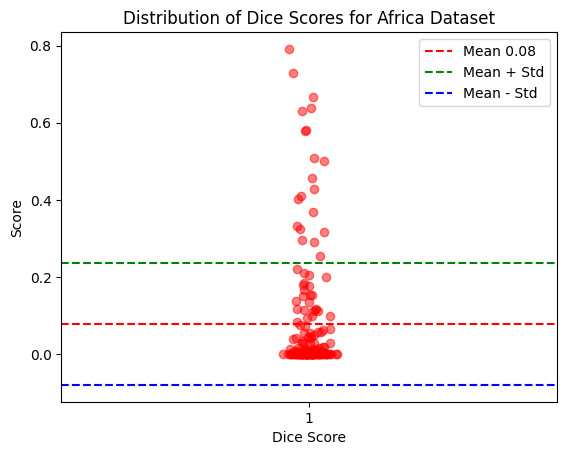

In [83]:
plt.boxplot(df["Dice"], showfliers=False)
plt.scatter(np.random.normal(1, 0.02, size=len(df["Dice"])), df["Dice"], alpha=0.5, color='red')
plt.title('Distribution of Dice Scores for Africa Dataset')
plt.axhline(y=df["Dice"].mean(), color='r', linestyle='--', label=f'Mean {df["Dice"].mean():.2f}')
plt.axhline(y=df["Dice"].mean() + df["Dice"].std(), color='g', linestyle='--', label='Mean + Std')
plt.axhline(y=df["Dice"].mean() - df["Dice"].std(), color='b', linestyle='--', label='Mean - Std')
plt.legend()
plt.xlabel('Dice Score')
plt.ylabel('Score')
plt.show()

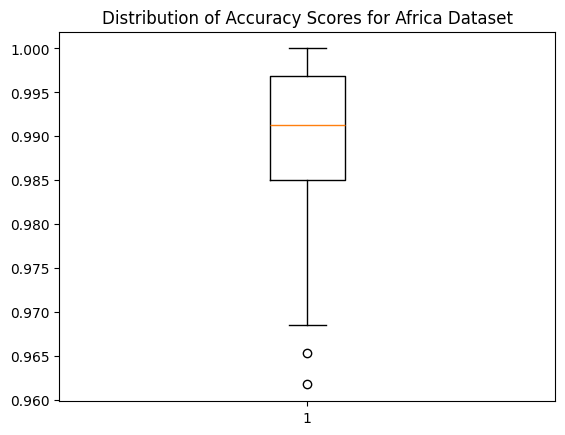

In [ ]:
plt.boxplot(df["Accuracy"])
plt.title('Distribution of Accuracy Scores for Africa Dataset')
plt.show()